# Homework 2
**Total Points: 5**

**Instructions:**
1. Complete parts 1 through 5, filling in code or responses where marked with `# YOUR CODE HERE` or `# YOUR RESPONSE HERE`.
2. Do not import additional libraries or move `import` commands.
3. When finished, run the full notebook by selecting <b>Kernel > Restart & Run All</b>. </li>
4. Submit this completed notebook file to <b>NYU Classes</b>. </li>

**Grading:** Each part is worth 1 point.

------------
###  Part 1: Sine Sweep

Write a function `sine_sweep()` that generates a sine sweep using the following equation: 
$$x(t) = a \cdot \sin\left(\text{cumsum}\left( \frac{2\pi f}{f_s} \right)\right)$$
where $a$ is the amplitude, $f_s$ is the sampling frequency and $f$ is a vector of logarithmically spaced frequency values. You may find it useful to use `np.cumsum()` and `np.logspace()`.

In [1]:
import numpy as np


In [2]:
def sine_sweep(f_min, f_max, fs, duration, amplitude):
   
    """ Generate a sine sweep.

    Parameters
    ----------
    f_min: float
        minimum frequency (Hz)
    f_max: float
        maximum frequency (Hz)
    fs: int
        sample rate (samples per second)
    duration: float
        length of the signal (seconds)
    amplitude: float
        amplitude
    
    Returns
    -------
    x: np.array
        sine sweep
    """
    f = np.logspace(np.log10(f_min), np.log10(f_max), num=int(fs*duration))
    x = amplitude * np.sin(np.cumsum(2 * np.pi * f / fs))
        
    return x

### Part 2: Discrete Fourier Transform
Create a function `my_dft()` that calculates the Discrete Fourier Transform of an audio signal using the following equation:
$$X[k] = \sum_{n=0}^{N-1} x[n]\cdot e^{-i 2\pi k n / N}$$
where $N$ is the total number of samples in the input. The output should be a complex-valued numpy array of equal length to the input array.

In [3]:
def my_dft(x):
   
    """ Calculate the Discrete Fourier Transform of an audio signal

    Parameters
    ----------
    x: np.array
        audio samples
    
    Returns
    -------
    dft: np.array
        DFT of samples (complex-valued)
    """
    n = len(x)
    dft = []
    for k in range(n):  # For each output element
        s = complex(0)
        for t in range(n):  # For each input element
            angle = 2j * np.pi * t * k / n
            s += x[t] * np.exp(-angle)
        dft.append(s)
    dft = np.array(dft)
    return dft


### Part 3: Plot DFT Frequencies
Create a function `plot_dft()` that plots the frequencies of an audio signal. The function should use `matplotlib.pyplot` to display a plot with the frequencies (Hz) om the X axis and the magnitude on the Y axis. Use the function you created in Part 2 to obtain the DFT of the input audio. Each axis should be labeled and scaled correctly. Remember to account for the DFT redundancy, and to plot the magnitudes of the complex numbers. Do not use librosa.

In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_dft(x, fs):
   
    """ Plot the frequencies and magnitudes of an audio signal

    Parameters
    ----------
    x: np.array
        audio samples
    
    fs: int
        sample rate
    
    Returns
    -------
    none
    
    """
    dft = my_dft(x)
    dft = abs(dft)
    dft = dft/len(dft)
    dft = dft[0:int(len(dft)/2)]
    plt.plot(dft)
    plt.xticks(np.linspace(0,len(dft),5),np.linspace(0,len(dft)*44100/len(dft),5))

### Intermission: Test Your Code
Use the following code to test your functions from Parts 1 - 3. A sine sweep is generated and an audio player is set. Then, two positions in the sine sweep are plotted (on the same figure); one from the beginning of the signal (around 500 Hz), and one from the end (around 5000 Hz). The plot should show clear vertical peaks at these frequencies.

In [6]:
import IPython.display as ipd

In [7]:
fs = 44100
f_min = 500
f_max = 5000
duration = 1.0
amplitude = .99

x_sweep = sine_sweep(f_min=f_min, f_max=f_max, fs=fs, duration=duration, amplitude=amplitude)

ipd.Audio(x_sweep, rate=fs)

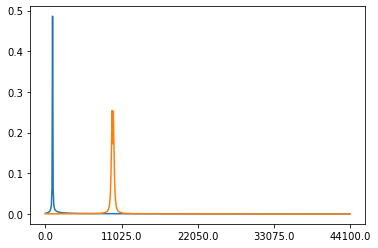

In [8]:
fs = 44100
plt.figure
plot_dft(x_sweep[0:1024],fs=fs)
plot_dft(x_sweep[fs-1024:fs],fs=fs)
plt.show()

### Part 4: Spectrogram
Write a function `plot_spectrogram()` that calculates and plots the spectrogram of a time-domain audio signal.
The plot should have the following features:
- the spectrogram should have the point (0, 0) at the bottom left corner of the plot
- the spectrogram's magnitude values should be scaled to dB
- the x-axis should label time in seconds
- the y-axis should label frequency in Hz
- the z-axis should be labeled using a colorbar

You may use `librosa.stft()`, `librosa.fft_frequencies()`, and/or `librosa.frames_to_time()`. Use `plt.imshow()` to display the spectrogram. *Do not use `librosa.display.specshow()`.*

In [9]:
import librosa

In [10]:
def plot_spectrogram(x, window_size, hop_size, window_type, fs, nfft):
    
    """Calculate and plot the spectrogram of a time-domain audio signal.

    Parameters
    ----------
    x : np.array
        time domain signal
    window_size : int
        window size (in samples)
    hop_size : int
        hop size (in samples)
    window_type : str
        window type (one of "boxcar" (rectangular), "triang", or "hann")
    fs : int
        sample rate (samples per second)
    nfft : int
        fft length (in samples)

    Returns
    -------
    None
    """
    z = np.abs(librosa.stft(x, window=window_type, hop_length=hop_size, n_fft=nfft))
    plt.figure(figsize=(5,3))
    plt.title("Short Time Fourier Transform")
    plt.imshow(librosa.amplitude_to_db(z), cmap='binary', origin='lower')
    plt.yticks(np.linspace(0,z.shape[0],6), np.round(np.linspace(0,z.shape[0]*fs/nfft,6), 1))
    plt.xticks(np.linspace(0,z.shape[1],6), np.round(np.linspace(0,z.shape[1]*hop_size/fs,6), 1))
    plt.xlabel("Time (sec)")
    plt.ylabel("Frequency (hz)")
    plt.axis('tight')
    plt.show()

------------
### Part 5: Analysis 
Explore how different parameter choices affect the spectrogram of a sine sweep. For each of the following variations:

- run `plot_spectrogram()`
- discuss what happens as you introduce each variation
- discuss why these effects occur

Unless otherwise stated, `N=128`, and for a window size `N`, use a hop size of `N/2`, a rectangular window, an fft length of `N`.


**A. Default parameters as above**

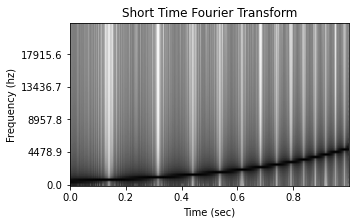

In [11]:
N = 128
plot_spectrogram(x_sweep, int(N), int(N/2), "boxcar", fs, int(N))

`# Looks like a spectrogram. You can tell where the fundamental frequency is of the sin sweep. However, there is a lot of spectral leakage. Spectral leakage is the white vertical lines. The spectrogram would likely look better with a different window and less of that spectral leakage that is distracting. `

**B. window size `N=256`, `N=512`, and `N=1024`**

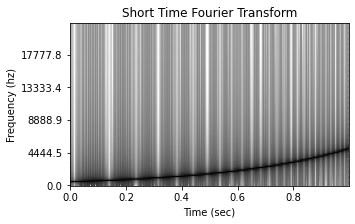

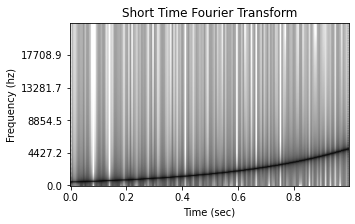

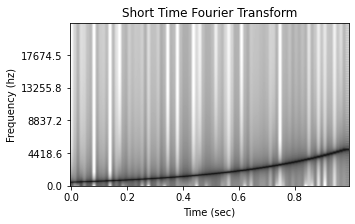

In [12]:
N = 256
plot_spectrogram(x_sweep, int(N), int(N/2), "boxcar", fs, int(N))
N = 512
plot_spectrogram(x_sweep, int(N), int(N/2), "boxcar", fs, int(N))
N = 1024
plot_spectrogram(x_sweep, int(N), int(N/2), "boxcar", fs, int(N))

`# The spectral lekage is less distracting as the window size is increased. It helps information be more clear in terms of frequency but less clear in terms of time.`

**C. window size `N=256` with hop size `N/4`, `N/16`, and `N/32`**

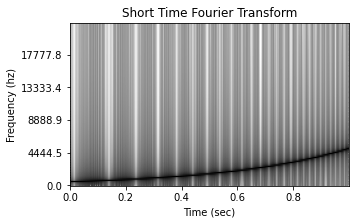

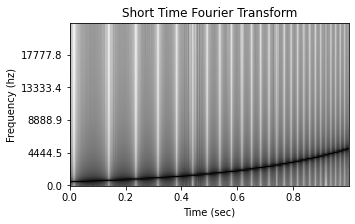

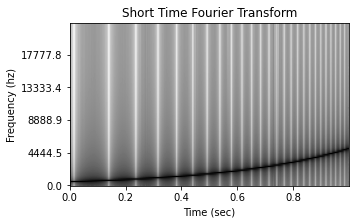

In [13]:
N = 256
plot_spectrogram(x_sweep, int(N), int(N/4), "boxcar", fs, int(N))
plot_spectrogram(x_sweep, int(N), int(N/16), "boxcar", fs, int(N))
plot_spectrogram(x_sweep, int(N), int(N/32), "boxcar", fs, int(N))

`# The larger hop size (N/4) offers more horizontal time information. In contrast, the smaller hop size offers less time information. There is significant spectral leakage in all three plots. `

**D. window types `triangular` and `hamming`**

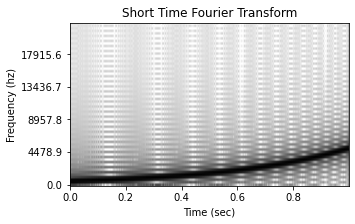

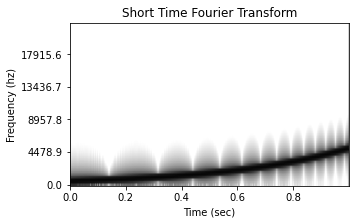

In [14]:
N = 128
plot_spectrogram(x_sweep, int(N), int(N/2), "triang", fs, int(N))
plot_spectrogram(x_sweep, int(N), int(N/2), "hann", fs, int(N))

`# Wow! These two new windows make the spectrogram very different. The rectangular/ boxcar window we've been using is less clear and there is more spectral leakage. With the triangular, we don't get as many vertical lines. The hann window is the most frequently used window for audio. The spectrogam looks clearer in that there is less spectral leakage, but at the same time there is a lot of white space that contains no information.`

**E. window size `N=256`, fft length `2N`, `4N` and `8N`**

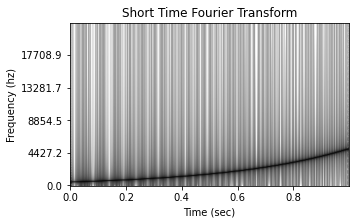

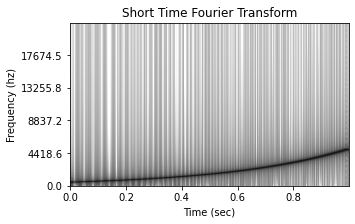

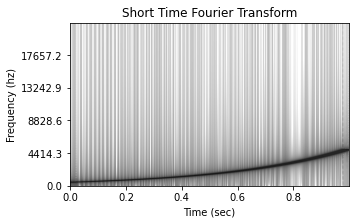

In [15]:
N = 256
plot_spectrogram(x_sweep, int(N), int(N/2), "boxcar", fs, int(2*N))
plot_spectrogram(x_sweep, int(N), int(N/2), "boxcar", fs, int(4*N))
plot_spectrogram(x_sweep, int(N), int(N/2), "boxcar", fs, int(8*N))

`# Increasing the fft length causes the time information to become more faint. There is spectral leakage but it is different than in the other plots. There is more fine vertical lines.`